In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv('datasets/housing.data',sep='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
277,0.06127,40.0,6.41,1,0.447,6.826,27.6,4.8628,4,254.0,17.6,393.45,4.16,33.1
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666.0,20.2,50.92,18.13,14.1
198,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329.0,12.6,392.20,6.62,34.6


In [29]:
# Same Simple linear Regration
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [30]:
# X = df['PTRATIO'].values.reshape(-1,1)
X = df.iloc[:, :-3].values
y = df['MEDV']
X.shape, y.shape

((506, 11), (506,))

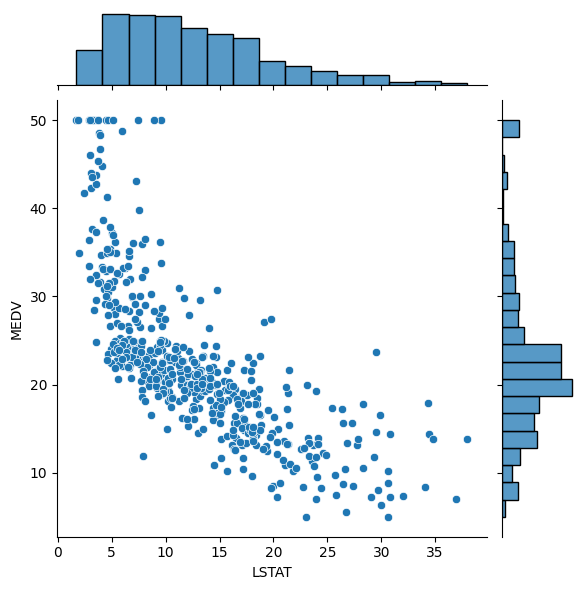

In [31]:
sns.jointplot(df, x='LSTAT', y='MEDV')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.08, random_state=0)

In [33]:
# x_train = scale.fit_transform(x_train) # Becouse x train is 2D array and training data so need fit transform
# x_test = scale.transform(x_test) # Its 1D array just the testing values so only transform

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(x_train,y_train)

LinearRegression()

In [35]:
predicted = model.predict(x_test)
print(predicted) , print(y_test)


[25.46282769 19.39297535 27.5720912   9.11548003 22.31739941 16.96403027
 18.52235191 20.02111399 17.49682129 21.67249256  3.7840403  21.44540963
 17.25606565  4.82313656 36.71241797 33.30924514 20.57853411 36.66285195
 30.27788339 22.03349198 23.78796504 21.73325883 20.83750507 30.29140613
 22.03422482  3.28036473 16.92260144 16.17838046 36.80733447 21.63694024
 18.0274811  15.69668306 18.55443589 24.03102802 27.76386396 16.55084579
 13.06346177 19.52486859 20.6884086  19.14581899 26.40386429]
329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
15     19.9
487    20.6
340    18.7
310    16.1
102    18.6
418     8.8
411    17.2
446    14.9
386    10.5
162    50.0
299    29.0
480    23.0
196    33.3
175    29.4
37     21.0
320    23.8
171    19.1
107    20.4
278    29.1
45     19.3
367    23.1
21     19.6
153    19.4
97     38.7
113    18.7
478    14.6
459    20.0
247    20.5
241    20.1
173    23.6
363    16.8
400     5.6
372    50.0
430    14.5
475    13.3
293    23.9
Name: ME

(None, None)

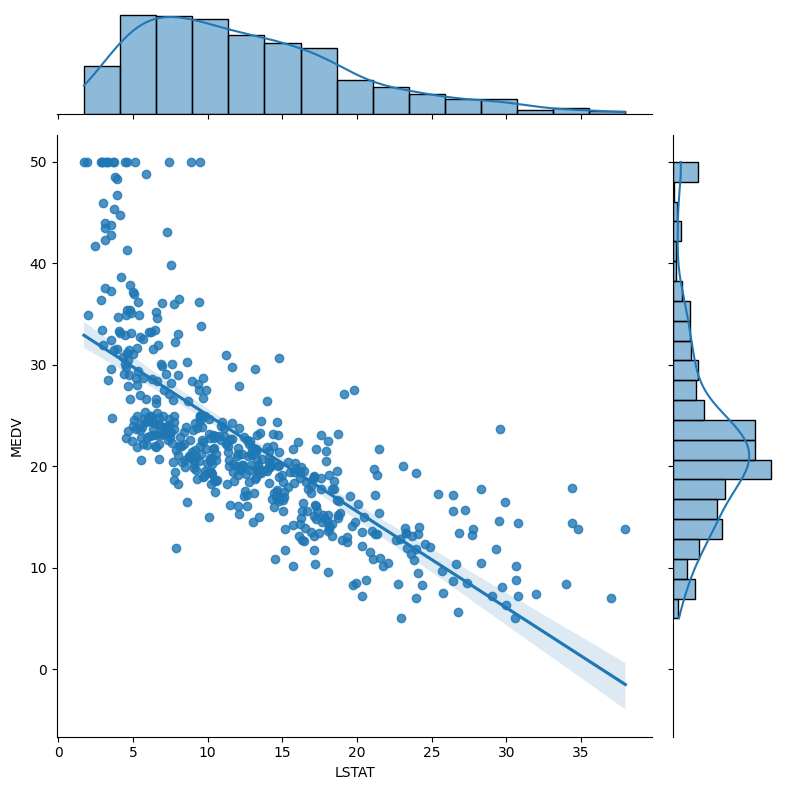

In [36]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=8);
plt.show();

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

r2_score(y_train, y_train_pred)

0.7068925000364824

In [38]:
r2_score(y_test, y_test_pred)

0.30151575037670875

In [39]:
# Adjusted R2 score
r2 = r2_score(y_train, y_train_pred)
print("Current R2: ", r2, "And Shape: ",x_test.shape)


Current R2:  0.7068925000364824 And Shape:  (41, 11)


In [41]:
print("Adjusted R2: ")
# 1- (1-r2 x n-1)/(n-1-k) k=result coluct count, n=shape
1 - ((1-r2)*(41-1)/(41-1-1))

Adjusted R2: 


0.699376923114341